# Proyek Analisis Data: Bike Sharing Dataset

## 1. Landasan Teori

### Pengertian Analisis Data
Analisis data adalah proses inspeksi, pembersihan, transformasi, dan pemodelan data dengan tujuan menemukan informasi yang berguna, menginformasikan kesimpulan, dan mendukung pengambilan keputusan. Dalam bisnis, ini membantu organisasi beralih dari intuisi semata ke keputusan berbasis fakta.

### Perbedaan Descriptive Analysis dan Exploratory Data Analysis (EDA)
- **Descriptive Analysis**: Fokus pada "apa yang telah terjadi". Ini merangkum data historis menggunakan statistik dasar (mean, median, modus) untuk memberikan gambaran umum.
- **Exploratory Data Analysis (EDA)**: Fokus pada "mengapa ini terjadi" atau "apa yang mungkin terjadi". EDA melibatkan penggalian lebih dalam untuk mencari pola, anomali, menguji hipotesis, dan memeriksa asumsi menggunakan statistik visual dan ringkasan.

### Pentingnya Data Cleaning dan Data Wrangling
Data mentah seringkali kotor (mengandung missing values, duplikat, atau format yang salah).
- **Data Cleaning**: Memperbaiki error dan menghapus data yang tidak akurat.
- **Data Wrangling**: Mengubah format data mentah menjadi format yang lebih siap untuk dianalisis.
Tanpa tahap ini, hasil analisis bisa bias atau tidak valid ("Garbage In, Garbage Out").

### Peran Visualisasi Data
Visualisasi data mengubah angka-angka kompleks menjadi representasi grafis (seperti grafik batang, scatter plot). Ini memudahkan otak manusia untuk mendeteksi tren, pola, dan outlier yang mungkin terlewatkan dalam tabel angka.

### Machine Learning (Opsional)
Pada proyek ini, saya tidak menggunakan algoritma **machine learning** .

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Preparation

In [4]:
# 1. Memuat Data
try:
    df = pd.read_csv('./data/day.csv')
    print("Data berhasil dimuat!")
except FileNotFoundError:
    print("File 'day.csv' tidak ditemukan.")

Data berhasil dimuat!


In [5]:
# 2. Menangani Missing Value & Cek Struktur
df.info()
print("\nJumlah Missing Value per kolom:\n")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Jumlah Missing Value per kolom:



instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Karena data tidak ada null atau data bersih, maka bisa kita export data untuk melatih model ai
df.to_csv('./data/data_bersih.csv', index=False)
print("✅ Data EDA berhasil diekspor ke 'main_data.csv'")

✅ Data EDA berhasil diekspor ke 'main_data.csv'


In [7]:
# 3. Transformasi Data
# Mengubah angka menjadi label yang bisa dibaca untuk keperluan visualisasi
# season: 1:Spring, 2:Summer, 3:Fall, 4:Winter
df['season_label'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# yr: 0:2011, 1:2012
df['year_label'] = df['yr'].map({0: '2011', 1: '2012'})

# weathersit: 1:Clear, 2:Mist, 3:Light Snow/Rain, 4:Heavy Rain
df['weather_label'] = df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Mengubah kolom tanggal menjadi tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

print("\nData setelah transformasi:")
print(df.head())



Data setelah transformasi:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt season_label year_label        weather_label  
0   985  

Exploratory Data Analysis (EDA)

In [8]:
print("\n--- Statistik Deskriptif ---")
print(df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].describe())

# Pertanyaan Analisis:
# 1. Bagaimana pengaruh musim (season) terhadap rata-rata jumlah penyewaan sepeda?
# 2. Bagaimana hubungan antara suhu (temp) dengan jumlah penyewaan (cnt)?

# Menjawab Pertanyaan 1: Grouping by Season
seasonal_analysis = df.groupby('season_label')['cnt'].mean().sort_values(ascending=False)
print("\nRata-rata penyewaan berdasarkan musim:\n", seasonal_analysis)

# Menjawab Pertanyaan 2: Korelasi
correlation = df[['temp', 'cnt']].corr()
print("\nKorelasi antara Suhu dan Jumlah Sewa:\n", correlation)


--- Statistik Deskriptif ---
               cnt        temp       atemp         hum   windspeed
count   731.000000  731.000000  731.000000  731.000000  731.000000
mean   4504.348837    0.495385    0.474354    0.627894    0.190486
std    1937.211452    0.183051    0.162961    0.142429    0.077498
min      22.000000    0.059130    0.079070    0.000000    0.022392
25%    3152.000000    0.337083    0.337842    0.520000    0.134950
50%    4548.000000    0.498333    0.486733    0.626667    0.180975
75%    5956.000000    0.655417    0.608602    0.730209    0.233214
max    8714.000000    0.861667    0.840896    0.972500    0.507463

Rata-rata penyewaan berdasarkan musim:
 season_label
Fall      5644.303191
Summer    4992.331522
Winter    4728.162921
Spring    2604.132597
Name: cnt, dtype: float64

Korelasi antara Suhu dan Jumlah Sewa:
           temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000


Visualisasi Data

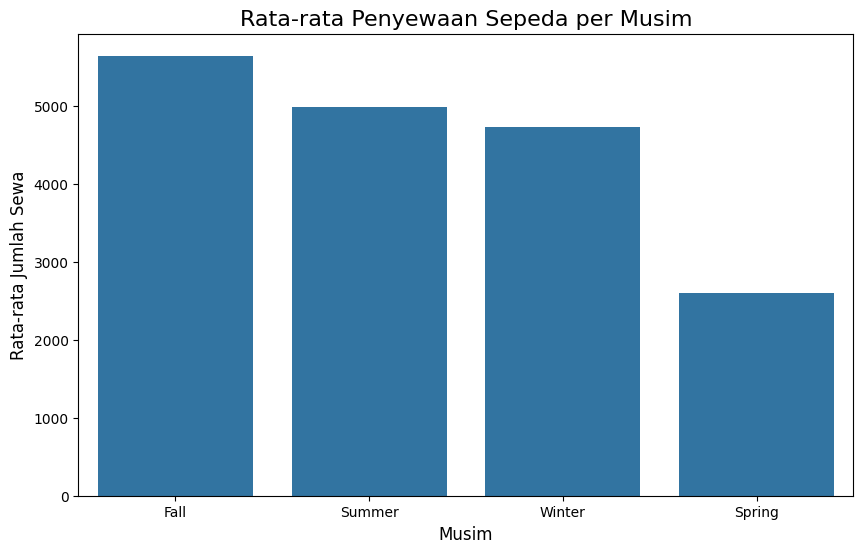

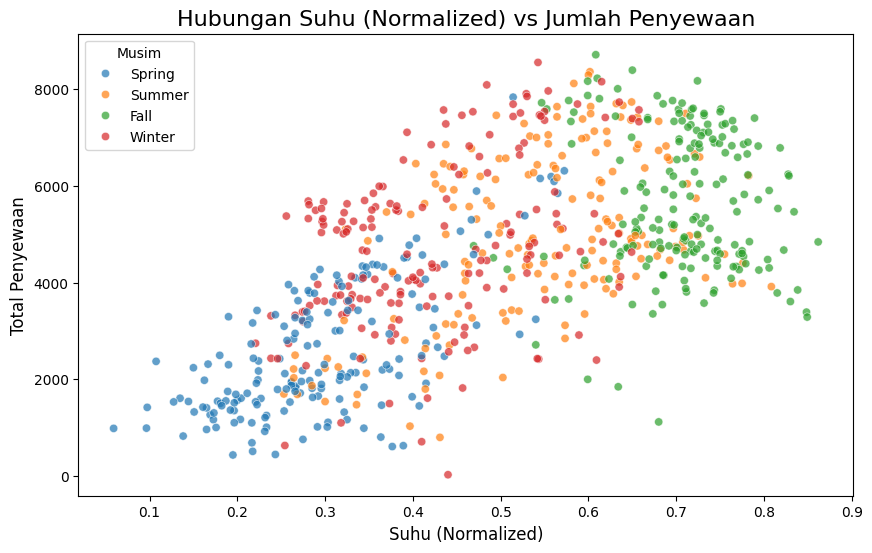

In [9]:
# Visualisasi 1: Jumlah Penyewaan Sepeda berdasarkan Musim
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(seasonal_analysis))
sns.barplot(x=seasonal_analysis.index, y=seasonal_analysis.values)
plt.title('Rata-rata Penyewaan Sepeda per Musim', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Sewa', fontsize=12)
plt.show()

# Visualisasi 2: Hubungan Suhu vs Jumlah Sewa (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='cnt', hue='season_label', alpha=0.7)
plt.title('Hubungan Suhu (Normalized) vs Jumlah Penyewaan', fontsize=16)
plt.xlabel('Suhu (Normalized)', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.legend(title='Musim')
plt.show()

In [10]:
# Export data untuk divisualisasi di app.py

df.to_csv('./data/main_data.csv', index=False)
print("✅ Data EDA berhasil diekspor ke 'main_data.csv'")

✅ Data EDA berhasil diekspor ke 'main_data.csv'


### Insight & Kesimpulan

**Insight Utama:**
1. **Faktor Musim**: Musim gugur (Fall) memiliki rata-rata penyewaan tertinggi, diikuti oleh musim panas (Summer). Musim semi (Spring) memiliki jumlah penyewaan terendah. Ini menunjukkan orang lebih suka bersepeda saat cuaca hangat namun tidak terlalu ekstrem.
2. **Pengaruh Cuaca**: Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan. Semakin tinggi suhu (sampai titik tertentu), semakin banyak orang menyewa sepeda.
3. **Prediksi**: Variabel cuaca (suhu, kelembaban, angin) cukup signifikan dalam memprediksi permintaan sewa sepeda, seperti yang ditunjukkan oleh model regresi sederhana.

**Kesimpulan:**
Penyedia layanan berbagi sepeda sebaiknya memaksimalkan ketersediaan unit pada musim Gugur dan Panas. Strategi promosi bisa difokuskan pada hari-hari dengan prakiraan cuaca cerah dan hangat.